## Task 1.1

In [257]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

sns.set()

In [258]:
# setting device on GPU if available, else CPU
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [259]:
## works with fractional form of the SIR model
def simulate_sir_simple(lam, mu, I_0, T, return_all=False):
    t = 0
    S = 1 - I_0
    I = I_0
    R = 0
    dt = 1
    X = []
    t_list = []
    S_list = []
    I_list = []
    R_list = []
    while t < T:
        t += dt
        dS = -lam * S * I
        dI = lam * S * I - mu * I
        dR = mu * I
        S += dt * dS
        I += dt * dI
        R += dt * dR
        t_list.append(t)
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)
        X.append((-dS, dR))
    if return_all:
        return X, t_list, S_list, I_list, R_list
    return X

In [260]:
K, t, S, I, R = simulate_sir_simple(0.2, 0.05, 0.01, 100, return_all=True)
print(K)

[(0.00198, 0.0005), (0.00226849392, 0.0005740000000000001), (0.002597355444696361, 0.0006587246960000001), (0.002971706249419525, 0.0007556562334348181), (0.0033971505603241346, 0.0008664587342340534), (0.003879765109011999, 0.0009929933255385574), (0.004426066031237222, 0.0011373319147122295), (0.005042944696638818, 0.0013017686205384791), (0.005737562838382164, 0.0014888274243434962), (0.006517195768118427, 0.0017012641950454295), (0.007389011134216767, 0.0019420607736990794), (0.00835976994956065, 0.0022144082917249642), (0.009435436965649767, 0.0025216763746167483), (0.010620689553459869, 0.002867364404168399), (0.011918318877962528, 0.0032550306616329727), (0.013328525236836261, 0.0036881950724494505), (0.014848121865052953, 0.004170211580668791), (0.016469678916064236, 0.004704107094887999), (0.018180661722503728, 0.005292385685946812), (0.01996264370687296, 0.005936799487774657), (0.02179070168858905, 0.006638091698729573), (0.023633124942724223, 0.007395722198222547), (0.025451

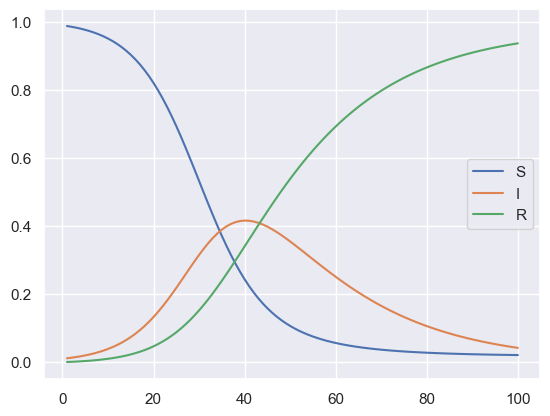

In [261]:
def plot_sir_simple(ax, t, S, I, R):
    ax.plot(t, S, label="S")
    ax.plot(t, I, label="I")
    ax.plot(t, R, label="R")
    ax.legend()
    return ax


fig, ax = plt.subplots()
plot_sir_simple(ax, t, S, I, R)
plt.show()

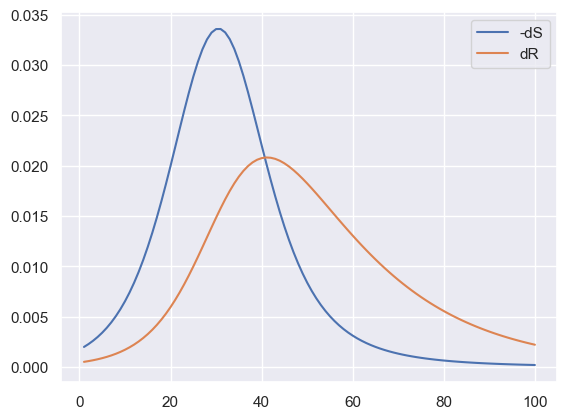

In [262]:
def plot_dS_dR(ax, t, K):
    ax.plot(t, [k[0] for k in K], label="-dS")
    ax.plot(t, [k[1] for k in K], label="dR")
    ax.legend()
    return ax


fig, ax = plt.subplots()
plot_dS_dR(ax, t, K)
plt.show()

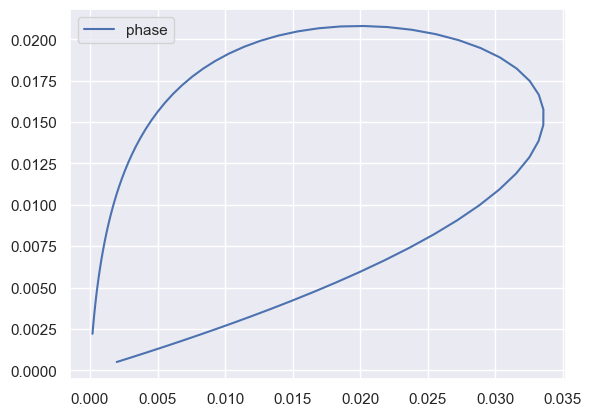

In [263]:
def plot_phase(ax, K):
    ax.plot([k[0] for k in K], [k[1] for k in K], label="phase")
    ax.legend()
    return ax


fig, ax = plt.subplots()
plot_phase(ax, K)
plt.show()

<div style="color: green; font-weight: bold">Comment
1.Implements the SIR model with fractional values for the compartments, assuming a total population size of 1. The initial values for Susceptible (S), Infected (I), and Recovered (R) are calculated based on the initial infected proportion, I_0.Whereas,in the sample code assumes a specific population size N and initializes the compartments accordingly. This approach considers a fixed number of individuals in each compartment, starting with N - I_0 - R_0 for Susceptible, I_0 for Infected, and R_0 for Recovered.<br>
2.Modularize the code by separating the derivative calculations into a function, similar to the sample code and optimize the data structures for efficiency, especially for larger T values.<br>




</div>

## Task 1.2

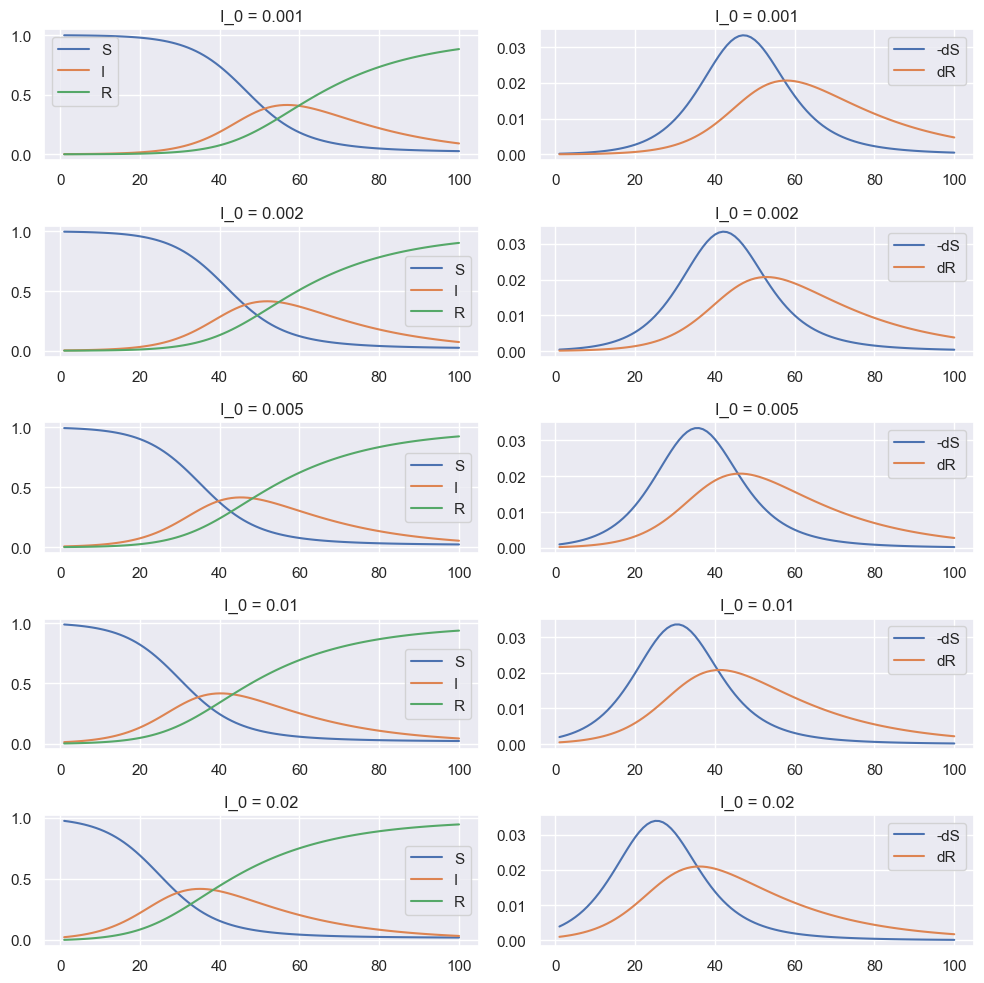

In [264]:
I_0_list = [0.001, 0.002, 0.005, 0.01, 0.02]

fig, ax = plt.subplots(len(I_0_list), 2, figsize=(10, 10))

for idx, I_0 in enumerate(I_0_list):
    K, t, S, I, R = simulate_sir_simple(0.2, 0.05, I_0, 100, return_all=True)
    plot_sir_simple(ax[idx, 0], t, S, I, R)
    plot_dS_dR(ax[idx, 1], t, K)
    ax[idx, 0].set_title("I_0 = {}".format(I_0))
    ax[idx, 1].set_title("I_0 = {}".format(I_0))

plt.tight_layout()
plt.show()

I_0 just shifts the distribution left or right.

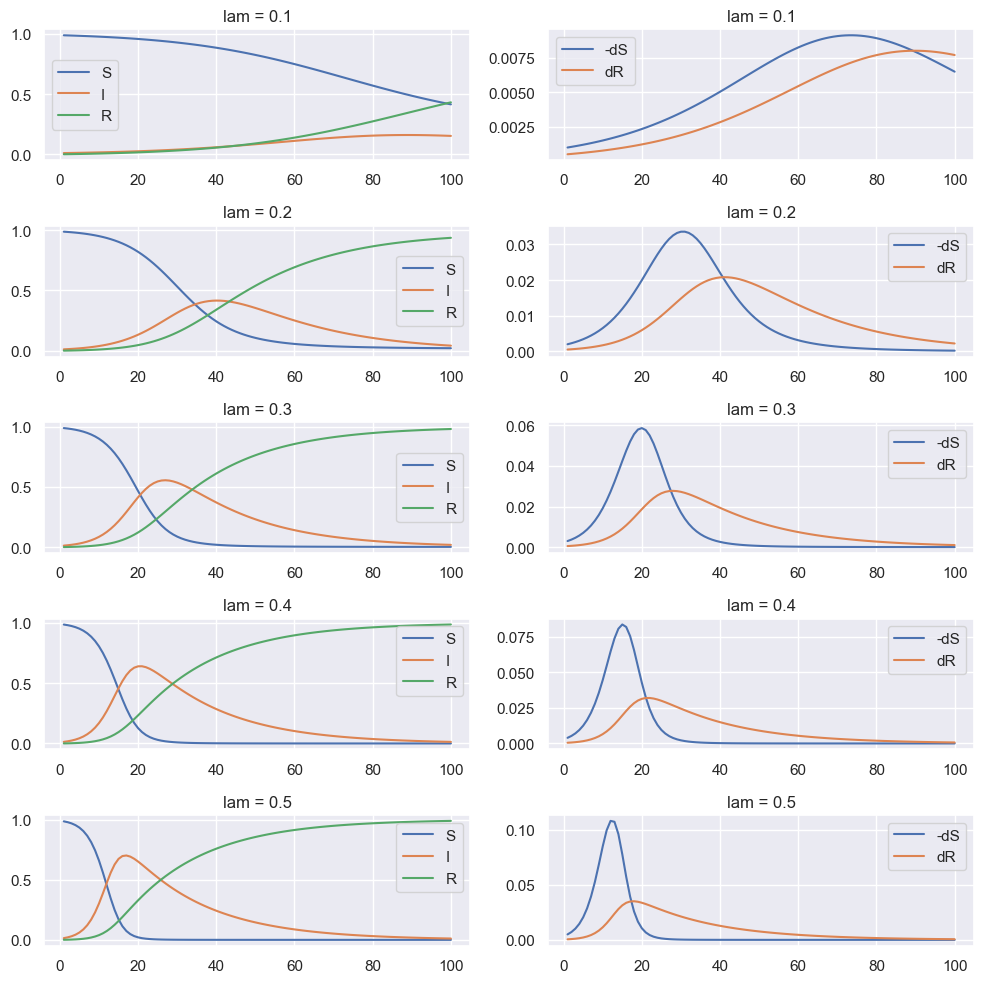

In [265]:
lam_list = [0.1, 0.2, 0.3, 0.4, 0.5]

fig, ax = plt.subplots(len(lam_list), 2, figsize=(10, 10))

for idx, lam in enumerate(lam_list):
    K, t, S, I, R = simulate_sir_simple(lam, 0.05, 0.01, 100, return_all=True)
    plot_sir_simple(ax[idx, 0], t, S, I, R)
    plot_dS_dR(ax[idx, 1], t, K)
    ax[idx, 0].set_title("lam = {}".format(lam))
    ax[idx, 1].set_title("lam = {}".format(lam))

plt.tight_layout()
plt.show()

lambda affects the width and height of the curve.

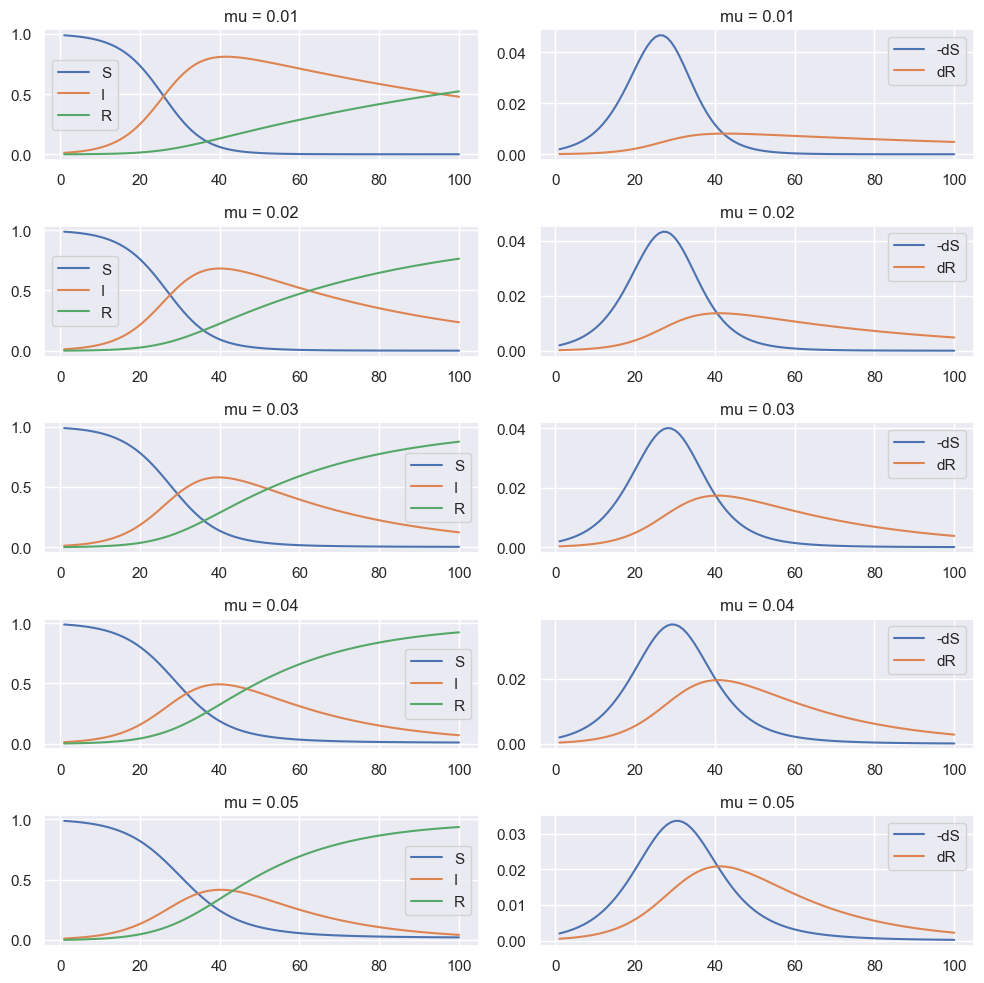

In [266]:
mu_list = [0.01, 0.02, 0.03, 0.04, 0.05]

fig, ax = plt.subplots(len(mu_list), 2, figsize=(10, 10))

for idx, mu in enumerate(mu_list):
    K, t, S, I, R = simulate_sir_simple(0.2, mu, 0.01, 100, return_all=True)
    plot_sir_simple(ax[idx, 0], t, S, I, R)
    plot_dS_dR(ax[idx, 1], t, K)
    ax[idx, 0].set_title("mu = {}".format(mu))
    ax[idx, 1].set_title("mu = {}".format(mu))

plt.tight_layout()
plt.show()

mu mostly affects the relative height of each curve.

## Generating the dataset

In [267]:
seed_value = 42
np.random.seed(seed_value)

generated_samples = 25000

In [268]:
## based on trial and error this parameters seem to yield interesting scenarios for the simulation in the first 100 days.

lambdas = np.random.beta(3, 5, generated_samples)
pdf_lambdas = scipy.stats.beta.pdf(lambdas, 3, 5)

mus = np.random.uniform(0, 0.1, generated_samples)
pdf_mus = scipy.stats.uniform.pdf(mus, 0, 0.1)

I_0s = np.random.uniform(0, 0.3, generated_samples)
pdf_I_0s = scipy.stats.uniform.pdf(I_0s, 0, 0.3)

In [269]:
## create simulation priors
pdf_Y = pdf_lambdas * pdf_mus * pdf_I_0s
Y = np.array([lambdas, mus, I_0s]).T
Y = np.c_[Y, pdf_Y]

In [270]:
# generate the training set

features = []
labels = []

for idx, (lam, mu, I_0) in enumerate(zip(lambdas, mus, I_0s)):
    current_prior = pdf_Y[idx]
    X = simulate_sir_simple(lam, mu, I_0, 100, return_all=False)
    X = np.array(X)
    X = X.flatten()
    features.append(X)
    labels.append([lam, mu, I_0])

features = np.array(features)
labels = np.array(labels)

In [271]:
class SIRDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        sample = {"features": self.features[index], "labels": self.labels[index]}
        return sample

In [272]:
test_size = 0.2
train_data, test_data, train_labels, test_labels = train_test_split(
    features, labels, test_size=test_size
)

print(len(train_data), len(test_data))

train_dataset = SIRDataset(train_data, train_labels)
test_dataset = SIRDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64)

20000 5000


In [273]:
def create_dataloader(dataset_size, batch_size):
    train_dataset_subset = torch.utils.data.Subset(
        train_dataset, np.random.choice(len(train_dataset), dataset_size, replace=False)
    )
    train_loader = DataLoader(train_dataset_subset, batch_size=batch_size, shuffle=True)
    return train_loader

In [274]:
dataloader = create_dataloader(2000, 32)
print(len(dataloader))  # 2000/32 = 62.5 -> 63

63


<div style="color: green; font-weight: bold">Comment<br>
1.Above code defines the prior distribution based on observed simulation outcomes and uses a combination of Beta and Uniform distributions for lambda, mu, and I_0. The approach is somewhat ad-hoc and may not fully capture the variability of the parameters.Whereas,sample code  uses a more systematic approach to define the prior distribution, incorporating statistical norms and gamma distributions. This method likely provides a more realistic representation of the parameter variability.<br>
2.Incorporate a wider range of parameter values and consider their combined effect on the SIR model dynamics.Use a more systematic approach to define the simulation prior, possibly incorporating statistical distributions as done in the sample code.</div>


## Task 1.3

In [275]:
# Define a simple feedforward neural network
class FeedForward(nn.Sequential):
    def __init__(self, input_size, output_size, hidden_size, no_layers=3):
        # Input layer
        modules = [nn.Linear(input_size, hidden_size)]
        modules.append(nn.ReLU())

        # Hidden layers
        for i in range(1, no_layers):
            modules.append(nn.Linear(hidden_size, hidden_size))
            modules.append(nn.ReLU())

        # Output layer
        modules.append(nn.Linear(hidden_size, output_size))

        # Sequential module to stack the layers
        super().__init__(*modules)


def evaluate_model(model, dataloader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    num_samples = 0

    predicted_labels = []

    with torch.no_grad():
        for batch_idx, batch in enumerate(dataloader):
            features = batch["features"].to(device)
            labels = batch["labels"].to(device)

            # Forward pass
            outputs = model(features)
            predicted_labels.append(outputs.cpu())
            loss = criterion(outputs, labels)

            total_loss += loss.item() * features.size(0)
            num_samples += features.size(0)

    average_loss = total_loss / num_samples

    # Add any other evaluation metrics here

    return average_loss, torch.cat(predicted_labels, dim=0)

In [276]:
# Define non-changing hyperparameters
T = 100
input_size = 2 * T
learning_rate = 0.0001

In [277]:
# TODO: this is not that informative because the colorbar only shows one gradient, maybe only show 2 dimensions for each plot.
# also the axis labels are not correct

from mpl_toolkits.mplot3d import Axes3D


def plot_predicted(ground_truth, labels):
    """
    ground_truth: (N,3) tensor of ground truth values
    labels: (N,3) tensor of predicted values
    """
    ## compute MSE loss
    mse = nn.MSELoss()
    mse_loss = mse(labels, ground_truth)

    # Extracting x, y, and color values from the tensors
    x_values1, y_values1, color_values1 = (
        ground_truth[:, 0].numpy(),
        ground_truth[:, 1].numpy(),
        ground_truth[:, 2].numpy(),
    )
    x_values2, y_values2, color_values2 = (
        labels[:, 0].numpy(),
        labels[:, 1].numpy(),
        labels[:, 2].numpy(),
    )

    # Create a scatter plot for the first dataset
    plt.scatter(
        x_values1,
        y_values1,
        c=color_values1,
        cmap="viridis",
        label="Dataset 1",
        alpha=0.5,
    )

    # Create a scatter plot for the second dataset
    plt.scatter(
        x_values2,
        y_values2,
        c=color_values2,
        cmap="plasma",
        label="Dataset 2",
        alpha=0.5,
    )

    # Add colorbar
    plt.colorbar(label="Third Dimension")

    # Set labels and title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("MSE: {}".format(mse_loss.item()))

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

In [278]:
def run_MLP_config(
    output_size,
    hidden_size,
    num_layers,
    dataset_size,
    learning_rate,
    epochs,
    log_loss=False,
    verbose=False,
):
    input_size = 2 * T

    train_loader = create_dataloader(dataset_size, 32)

    model = FeedForward(input_size, output_size, hidden_size, num_layers).to(device)

    criterion = nn.MSELoss()

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    ## train and evaluate model

    train_losses = []

    test_losses = []

    for epoch in tqdm.tqdm(range(epochs), leave=verbose):
        for batch_idx, batch in enumerate(train_loader):
            features = batch["features"].to(device)
            labels = batch["labels"].to(device)

            # Forward pass

            outputs = model(features)
            loss = criterion(outputs, labels)

            # Backward pass

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch % 10 == 0 and log_loss:
            if verbose:
                print("Epoch {}, loss {}".format(epoch, loss.item()))

            ## evaluate model

            test_loss, _ = evaluate_model(model, test_loader, criterion)

            if verbose:
                print("Test loss {}".format(test_loss))

            train_losses.append(loss.item())
            test_losses.append(test_loss)

    if log_loss:
        return model, train_losses, test_losses

    return model

#### Run a dummy configuration with good hyperparameters

In [279]:
output_size = 3
hidden_size = 100

model = run_MLP_config(
    output_size,
    hidden_size,
    num_layers=3,
    dataset_size=10000,
    learning_rate=0.0001,
    epochs=10,
)

average_loss, predicted_labels = evaluate_model(model, test_loader, nn.MSELoss())

## visual inspection shows that predicted values are close to the ground truth values

for i in range(10):
    print("Ground truth:", test_labels[i], "Predicted:", predicted_labels[i].tolist())

Ground truth: [0.42312419 0.08161002 0.22473122] Predicted: [0.4298623502254486, 0.0835484117269516, 0.22655825316905975]
Ground truth: [0.47562658 0.07076723 0.25521385] Predicted: [0.48157697916030884, 0.0773877203464508, 0.24448804557323456]
Ground truth: [0.40701357 0.0164571  0.01512166] Predicted: [0.37678298354148865, 0.017814934253692627, 0.02690962702035904]
Ground truth: [0.30467309 0.05904089 0.23364989] Predicted: [0.3031086027622223, 0.07273571193218231, 0.22487394511699677]
Ground truth: [0.35826827 0.04915625 0.03560957] Predicted: [0.38043662905693054, 0.05682927370071411, 0.037752121686935425]
Ground truth: [0.39653078 0.08410005 0.2076748 ] Predicted: [0.3978953957557678, 0.0846952348947525, 0.21778343617916107]
Ground truth: [0.34780827 0.02662426 0.19856346] Predicted: [0.35428449511528015, 0.03163225203752518, 0.20327188074588776]
Ground truth: [0.47399075 0.02083558 0.00521125] Predicted: [0.38200798630714417, 0.023732127621769905, 0.004770852625370026]
Ground tru

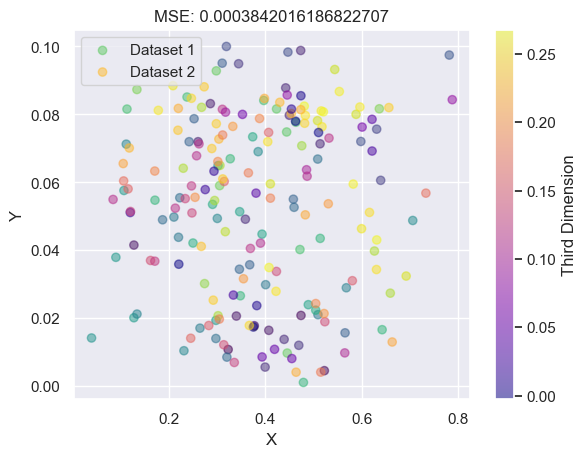

In [280]:
## we can see that pair of points are quite close to each other meaning that our prediction actually works
plot_predicted(torch.tensor(test_labels[:100]), predicted_labels[:100].cpu())

### Evaluate hyperparameters

In [281]:
# TODO: make dictionary ca nu iti dai seama din repetii de unde vin probel;e si nu stii cum sa le plotezi
# TODO: please use english on todos that you push to github

hidden_sizes = [5, 10, 20, 50, 100, 200, 500]
losses_hid = []
num_layers = [1, 2, 3, 4, 5, 6, 7]
losses_layers = []
dataset_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000]
losses_sizes = []

criterion = nn.MSELoss()

EPOCHS = 10

In [282]:
models_hidden_size = {}
models_num_layers = {}
models_dataset_sizes = {}

In [283]:
%%script false

for hidden_size in tqdm.tqdm(hidden_sizes, desc="hidden_size"):
    model = run_MLP_config(
        output_size=3,
        hidden_size=hidden_size,
        num_layers=3,
        dataset_size=2000,
        learning_rate=0.0001,
        epochs=EPOCHS,
    )
    models_hidden_size[hidden_size] = model

for lay in tqdm.tqdm(num_layers, desc="num_layers"):
    model = run_MLP_config(
        output_size=3,
        hidden_size=50,
        num_layers=lay,
        dataset_size=2000,
        learning_rate=0.0001,
        epochs=EPOCHS,
    )
    models_num_layers[lay] = model

for sizes in tqdm.tqdm(dataset_sizes, desc="dataset_sizes"):
    model = run_MLP_config(
        output_size=3,
        hidden_size=50,
        num_layers=3,
        dataset_size=sizes,
        learning_rate=0.0001,
        epochs=EPOCHS,
    )
    models_dataset_sizes[sizes] = model

Couldn't find program: 'false'


In [284]:
models = {
    "hidden_size": models_hidden_size,
    "num_layers": models_num_layers,
    "dataset_sizes": models_dataset_sizes,
}

In [285]:
%%script false

# save models to disk so we don't have to retrain them
torch.save(models, "models.pt")

Couldn't find program: 'false'


In [286]:
models = torch.load("models.pt")

In [287]:
test_errors = {}
test_errors["hidden_size"] = []
test_errors["num_layers"] = []
test_errors["dataset_sizes"] = []

for hid_size in tqdm.tqdm(hidden_sizes, desc="hidden_size"):
    model = models["hidden_size"][hid_size]
    test_loss, _ = evaluate_model(model, test_loader, criterion)
    test_errors["hidden_size"].append(test_loss)

for lay in tqdm.tqdm(num_layers, desc="num_layers"):
    model = models["num_layers"][lay]
    test_loss, _ = evaluate_model(model, test_loader, criterion)
    test_errors["num_layers"].append(test_loss)

for sizes in tqdm.tqdm(dataset_sizes, desc="dataset_sizes"):
    model = models["dataset_sizes"][sizes]
    test_loss, _ = evaluate_model(model, test_loader, criterion)
    test_errors["dataset_sizes"].append(test_loss)

dataset_sizes: 100%|██████████| 8/8 [00:00<00:00, 21.39it/s]


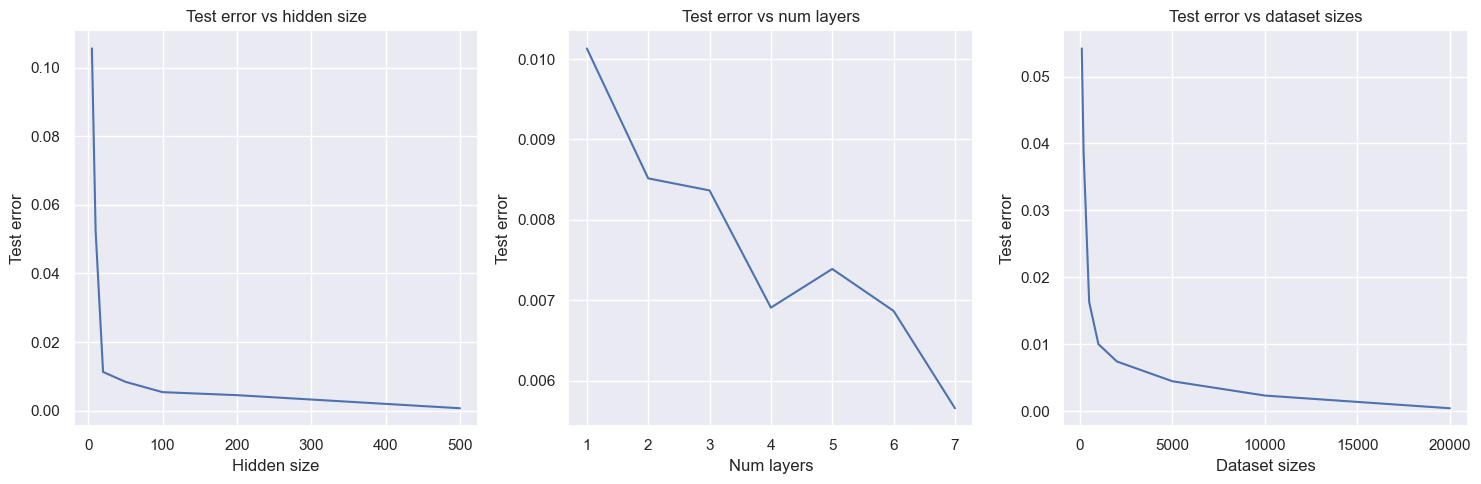

In [288]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(hidden_sizes, test_errors["hidden_size"])
ax[0].set_title("Test error vs hidden size")
ax[0].set_xlabel("Hidden size")
ax[0].set_ylabel("Test error")

ax[1].plot(num_layers, test_errors["num_layers"])
ax[1].set_title("Test error vs num layers")
ax[1].set_xlabel("Num layers")
ax[1].set_ylabel("Test error")

ax[2].plot(dataset_sizes, test_errors["dataset_sizes"])
ax[2].set_title("Test error vs dataset sizes")
ax[2].set_xlabel("Dataset sizes")
ax[2].set_ylabel("Test error")

plt.tight_layout()
plt.show()

After looking at the results, I decided to use the following hyperparameters since they have good results and are not too computationally expensive:
- hidden_size = 50
- num_layers = 3
- dataset_size = 2000

dataset_size can be increased if we want better results and num_layers doesn't matter too much so it could be decreased.

In [289]:
%%script false

model = run_MLP_config(
    output_size=3,
    hidden_size=50,
    num_layers=3,
    dataset_size=10000,
    learning_rate=0.0001,
    epochs=100,
)

Couldn't find program: 'false'


In [290]:
%%script false

torch.save(model, "model1.pt")

Couldn't find program: 'false'


In [291]:
model = torch.load("model1.pt")

In [292]:
test_loss, _ = evaluate_model(model, test_loader, criterion)
test_loss

5.5388543781009505e-05

looks good

<div style="color: green; font-weight: bold">Comment<br>
1.Above code Implements a basic feedforward neural network (FeedForward) with multiple hidden layers and ReLU activation. The network is relatively simple and straightforward, designed for direct mapping from input features to output predictions.whereas sample code uses a more sophisticated neural network (SummaryNN) that can incorporate both convolutional and dense layers. This architecture is more flexible and potentially more powerful, especially when dealing with time-series data like the output of the SIR model.<br>
2.Sample Code places a significant emphasis on preprocessing. It normalizes the data based on the statistics of the prior distribution and the simulated data, which can be crucial for training stability and model performance which is lacking here.<br>
3.Above Code Provides basic visualizations for comparing the predicted and actual parameters. However, the analysis of these results is somewhat limited.But Sample Code Includes detailed visualizations that compare true vs. predicted parameters and provides R-squared values for each parameter. This approach gives a more nuanced understanding of the model's performance across different regions of the parameter space.


## Task 1.4

In [293]:
def make_summary_network(model):
    return nn.Sequential(*list(model.children())[:-2])

In [294]:
summary_network = make_summary_network(model)

In [295]:
import math
from scipy.stats import special_ortho_group


def subnet_constructor(input_size, hidden_size, output_size):
    model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, output_size),
    )
    return model

def ortogonal_matrix(dim):
    """A = torch.normal(mean=torch.zeros((dim,dim)), std=torch.ones((dim,dim)))
    Q, _ = torch.linalg.qr(A)
    if dim == 2:
        Q[1,1] = -Q[0,0]
        Q[0,1] = -Q[1,0]
    print(torch.linalg.det(Q))
    return Q"""
    Q = special_ortho_group.rvs(dim)
    return torch.Tensor(Q)


class conditional_coupling_block(nn.Module):
    def __init__(self, input_size, hidden_size, condition_size):
        super().__init__()
        self.split1 = math.floor(input_size / 2)
        self.split2 = input_size - self.split1
        self.subnet = subnet_constructor(
            self.split1 + condition_size, hidden_size, 2 * self.split2
        )

    def forward(self, x, cond, rev=False):
        x1, x2 = x[..., : self.split1], x[..., self.split1 :]
        params = self.subnet(torch.cat([x1, cond], -1))
        s, t = params[..., : self.split2], params[..., self.split2 :]
        s = torch.tanh(s)
        ljd = torch.sum(s, -1)

        if not rev:
            s = torch.exp(s)
            x2 = s * x2 + t
            return torch.cat([x1, x2], -1), ljd
        if rev:
            s = torch.exp(-s)
            x2 = s * (x2 - t)
            return torch.cat([x1, x2], -1)


class conditional_realNVP(nn.Module):
    def __init__(self, input_size, hidden_size, n_blocks, condition_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.n_blocks = n_blocks
        self.condition_size = condition_size
        self.coupling_blocks = nn.ModuleList(
            [
                conditional_coupling_block(input_size, hidden_size, self.condition_size)
                for _ in range(n_blocks)
            ]
        )
        self.orthogonal_matrices = [
            ortogonal_matrix(input_size) for _ in range(n_blocks - 1)
        ]

    def forward(self, x, cond, rev=False):
        if rev:
            return self._inverse(x, cond)
        return self._forward(x, cond)

    def _forward(self, x, cond):
        ljd = torch.zeros((x.shape[0]))
        for l in range(self.n_blocks - 1):
            x, partial_ljd = self.coupling_blocks[l](x, cond)
            ljd += partial_ljd
            x = torch.matmul(x, self.orthogonal_matrices[l])
        x, partial_ljd = self.coupling_blocks[-1](x, cond)
        ljd += partial_ljd
        return x, ljd

    def _inverse(self, x, cond):
        for l in range(self.n_blocks - 1, 0, -1):
            x = self.coupling_blocks[l](x, cond, rev=True)
            x = torch.matmul(x, self.orthogonal_matrices[l - 1].T)
        x = self.coupling_blocks[0](x, cond, rev=True)
        return x

    def sample(self, num_samples, cond=None):
        samples = []
        if cond is None: # TODO: for cond=None, this is not working
            for c in range(self.condition_size):
                z = torch.normal(
                    mean=torch.zeros((num_samples, self.input_size)),
                    std=torch.ones((num_samples, self.input_size)),
                )
                print(z.shape)
                samples.append(self._inverse(z, cond=c * torch.ones(num_samples)))
        else:
            z = torch.normal(
                mean=torch.zeros((num_samples, self.input_size)),
                std=torch.ones((num_samples, self.input_size)),
            )
            samples.append(self._inverse(z, cond=cond.repeat(num_samples, 1)))
        return torch.cat(samples, 0)

In [296]:
class Hybrid_Network(nn.Module):
    def __init__(self, summary_network, flow_network):
        super().__init__()
        self.summary_network = summary_network
        self.flow_network = flow_network

    def forward(self, y, x):
        cond = self.summary_network(x)
        y, ljd = self.flow_network(y, cond)
        return y, ljd
    
    # turn off/on training for specific parts of the network    
    def turn_off_flow_grad(self):
        for param in self.flow_network.parameters():
            param.requires_grad = False
    
    def turn_on_flow_grad(self):
        for param in self.flow_network.parameters():
            param.requires_grad = True

    def turn_off_summary_grad(self):
        for param in self.summary_network.parameters():
            param.requires_grad = False
    
    def turn_on_summary_grad(self):
        for param in self.summary_network.parameters():
            param.requires_grad = True

    # print which parts of the network are trainable
    def print_trainable(self):
        for param in self.flow_network.parameters():
            print(param.requires_grad)
        for param in self.summary_network.parameters():
            print(param.requires_grad)

    def sample(self, num_samples, cond=None):
        if cond is not None:
            cond = self.summary_network(cond)
        return self.flow_network.sample(num_samples, cond=cond)

In [297]:
test_realnvp = conditional_realNVP(3, 9, 8, 50)
test_hybrid = Hybrid_Network(summary_network, test_realnvp)

In [298]:
def train_cinn(
    model,
    dataset_size,
    learning_rate,
    epochs,
):
    train_loader = create_dataloader(dataset_size, 32)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    ## train and evaluate model
    for _ in tqdm.tqdm(range(epochs)):
        for batch in train_loader:
            features = batch["features"].to(device)
            labels = batch["labels"].to(device)

            optimizer.zero_grad()

            # Forward pass
            z, ljd = model(labels, features)

            # Backward pass
            loss = torch.sum(0.5 * torch.sum((z-labels) ** 2, -1) - ljd) / features.shape[0]
            loss.backward()
            optimizer.step()

    return model

In [299]:
test_hybrid = train_cinn(
    test_hybrid,
    dataset_size=10000,
    learning_rate=0.0001,
    epochs=30,
)

100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


In [300]:
def evaluate_hybrid_model(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    num_samples = 0

    predicted_labels = []

    with torch.no_grad():
        for batch_idx, batch in enumerate(dataloader):
            features = batch["features"].to(device)
            labels = batch["labels"].to(device)
            
            z, ljd  = model(labels, features)

            total_loss += torch.sum(0.5*torch.sum((z-labels)**2, -1))
            num_samples += features.size(0)
            
            predicted_labels.append(z.cpu())


    average_loss = total_loss / num_samples

    # Add any other evaluation metrics here

    return average_loss, torch.cat(predicted_labels, dim=0)

In [301]:
print(evaluate_hybrid_model(test_hybrid, test_loader)[0])

tensor(0.7985)


In [302]:
fixed_x1 = simulate_sir_simple(0.2, 0.05, 0.01, 100, return_all=False)
fixed_x1 = np.array(fixed_x1)
fixed_x1 = fixed_x1.flatten()
fixed_x1 = torch.tensor(fixed_x1, dtype=torch.float32).to(device)
samples = test_hybrid.sample(10, fixed_x1).cpu().detach().numpy()

In [303]:
samples

array([[ 0.49384537,  0.06122466,  0.02363126],
       [ 0.26400226,  0.08214094, -0.09145444],
       [ 0.38033804,  0.07017166, -0.01139831],
       [ 0.05059477,  0.04970455,  0.01013727],
       [ 0.16309996,  0.02980296,  0.08002459],
       [ 0.11207315,  0.03724398,  0.03779696],
       [ 0.3634106 ,  0.05884416,  0.00235226],
       [ 0.23841947,  0.08159927, -0.06744847],
       [ 0.1336321 ,  0.05548158,  0.00710323],
       [ 0.16170873,  0.04512822,  0.03105673]], dtype=float32)

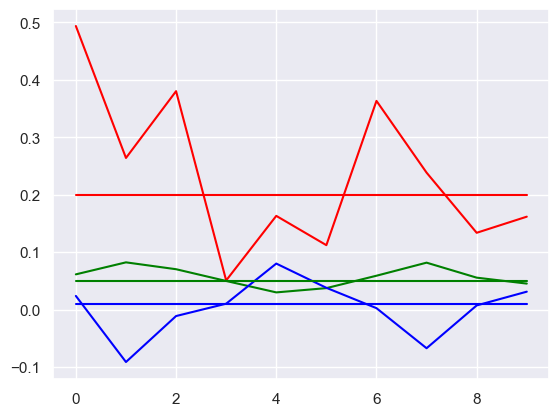

In [304]:
# plot the samples
plt.plot(samples[...,0], color='red')
plt.plot(samples[...,1], color='green')
plt.plot(samples[...,2], color='blue')
plt.plot([0,9], [0.2,0.2], color='red')
plt.plot([0,9], [0.05,0.05], color='green')
plt.plot([0,9], [0.01,0.01], color='blue')

plt.show()


samples seem to match up

In [305]:
xis = create_dataloader(6, 32)

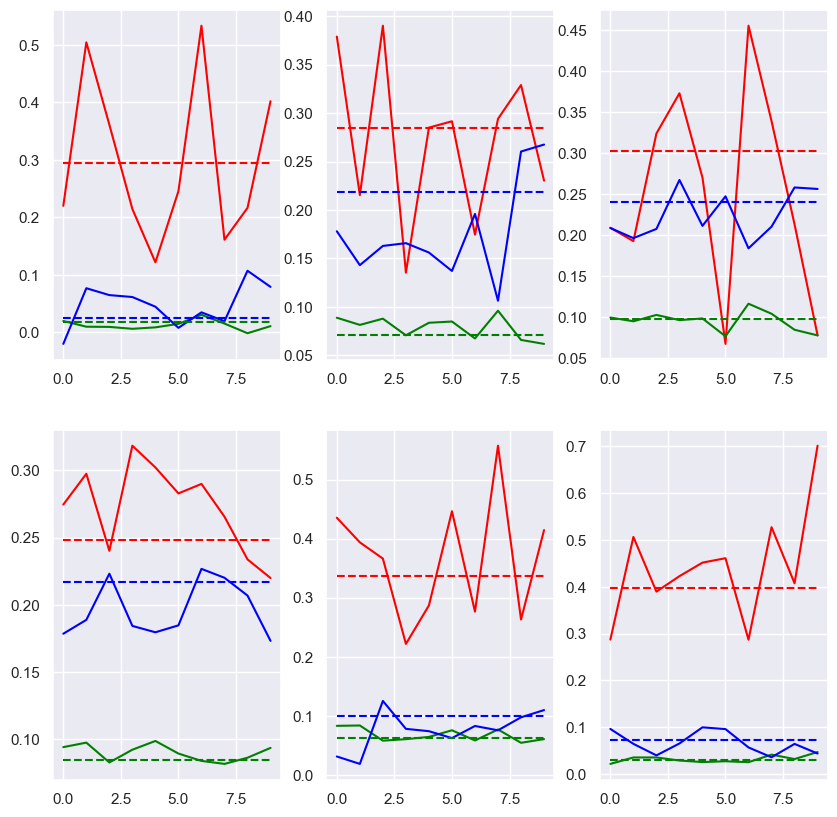

In [306]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

for batch in xis:
    for i in range(6):
        samples = test_hybrid.sample(10, batch["features"][i]).cpu().detach().numpy()
        current_ax = ax[i//3, i%3]
        current_ax.plot(samples[...,0], color='red')
        current_ax.plot(samples[...,1], color='green')
        current_ax.plot(samples[...,2], color='blue')
        current_ax.plot([0,9], batch["labels"][i][0]*np.ones(2), color='red', linestyle='dashed')
        current_ax.plot([0,9], batch["labels"][i][1]*np.ones(2), color='green', linestyle='dashed')
        current_ax.plot([0,9], batch["labels"][i][2]*np.ones(2), color='blue', linestyle='dashed')
        
plt.show()

In [310]:
xis = create_dataloader(6, 32)

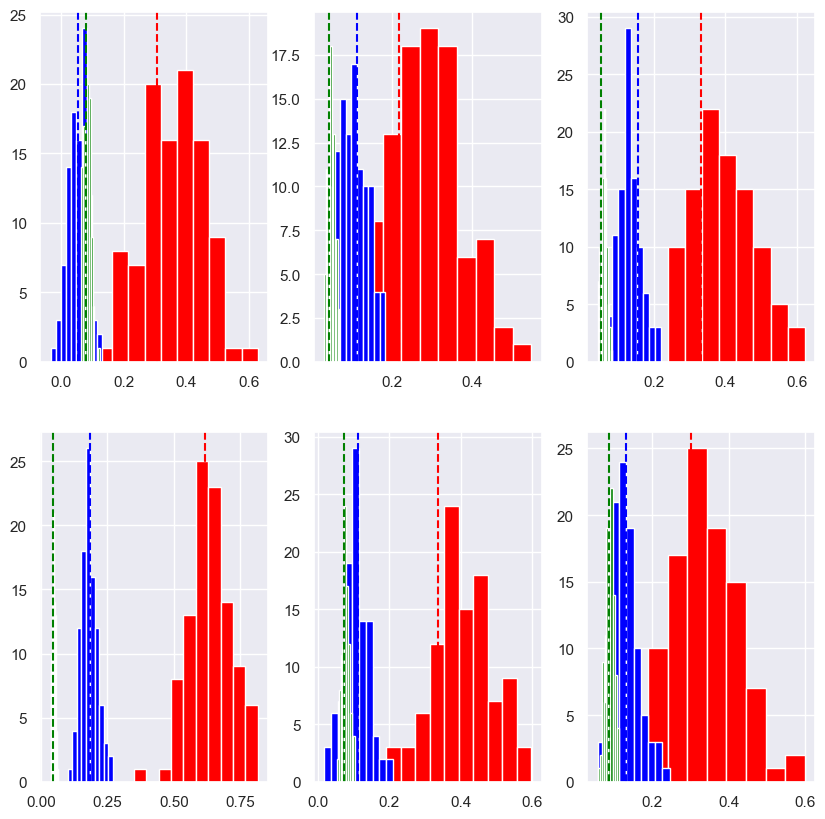

In [311]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

for batch in xis:
    for i in range(6):
        samples = test_hybrid.sample(100, batch["features"][i]).cpu().detach().numpy()
        current_ax = ax[i//3, i%3]
        current_ax.hist(samples[...,0], color='red')
        current_ax.hist(samples[...,2], color='blue')
        current_ax.hist(samples[...,1], color='green')
        current_ax.axvline(batch["labels"][i][0], color='red', linestyle='dashed')
        current_ax.axvline(batch["labels"][i][1], color='green', linestyle='dashed')
        current_ax.axvline(batch["labels"][i][2], color='blue', linestyle='dashed')
        
plt.show()

<div style="color: green; font-weight: bold">Comment<br>

1.Above's Code Implements a conditional RealNVP model with a focus on custom layers like conditional_coupling_block and conditional_realNVP. The summary network is created by modifying an existing network to exclude the last layers. The code includes orthogonal matrices and custom subnet construction.Whereas, Sample Code Focuses on a more structured approach using classes like Permutation, ActNorm, AffineCoupling, and ConditionalRealNVP. The sample code emphasizes the use of default settings and more elaborate configurations for the coupling layers.<br>
2.Above's Code Utilizes a hybrid training approach that involves training a combined model (Hybrid_Network) comprising both the summary network and the flow network. The loss function includes a focus on negative log-likelihood (NLL) loss, taking into account the log-determinant of the Jacobian.whereas,Sample Code Demonstrates a similar approach but with more emphasis on loss functions like nll_loss_gaussian and mmd (Maximum Mean Discrepancy) for training. It also explores the impact of noise on training and provides a more nuanced analysis</div>

## Task 1.6

In [369]:
xis = create_dataloader(6, 32)

In [371]:
for batch in xis:
    for i in range(6):
        C = batch["features"][i]
        samples = test_hybrid.sample(1000, C).cpu().detach().numpy()
        C_star = []
        for sample in samples:
            simulated = simulate_sir_simple(sample[0], np.clip(sample[1], a_min=0, a_max = None), np.clip(sample[2], a_min=0, a_max = None), 100, return_all=False)
            simulated = np.array(simulated)
            simulated = simulated.flatten()
            C_star.append(simulated)
        confint = np.quantile(C_star, [0.025, 0.975], axis=0) # 95% confidence interval
        C = C.cpu().detach().numpy()

        in_quantile = np.logical_and(confint[0] < C, C < confint[1])
        print("in quantile:", np.sum(in_quantile))

in quantile: 200
in quantile: 182
in quantile: 200
in quantile: 200
in quantile: 200
in quantile: 200


## Task 3

In [372]:
def mmd_inverse_multi_quadratic(x,y,bandwidths=None):
    batch_size = x.size()[0]
    xx, yy, xy = torch.mm(x,x.t()), torch.mm(y,y.t()), torch.mm(x,y.t())
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))
    K, L, P = 0, 0, 0
    if bandwidths is None:
        bandwidths = [0.4, 0.8, 1.6]

    for sigma in bandwidths:
        s = 1.0 / sigma**2
        K += 1.0 / (1.0 + s * (rx.t() + rx - 2.0*xx))
        L += 1.0 / (1.0 + s * (ry.t() + ry - 2.0*yy))
        P += 1.0 / (1.0 + s * (rx.t() + ry - 2.0*xy))
    
    beta = 1./(batch_size*(batch_size-1)*len(bandwidths))
    gamma = 2./(batch_size**2 * len(bandwidths))
    return beta * (torch.sum(K)+torch.sum(L)) - gamma * torch.sum(P)

In [381]:
# returns the cond in the forward pass

class Hybrid_Network_cond(nn.Module):
    def __init__(self, summary_network, flow_network):
        super().__init__()
        self.summary_network = summary_network
        self.flow_network = flow_network

    def forward(self, y, x):
        cond = self.summary_network(x)
        y, ljd = self.flow_network(y, cond)
        return y, ljd,cond
    
    # turn off/on training for specific parts of the network    
    def turn_off_flow_grad(self):
        for param in self.flow_network.parameters():
            param.requires_grad = False
    
    def turn_on_flow_grad(self):
        for param in self.flow_network.parameters():
            param.requires_grad = True

    def turn_off_summary_grad(self):
        for param in self.summary_network.parameters():
            param.requires_grad = False
    
    def turn_on_summary_grad(self):
        for param in self.summary_network.parameters():
            param.requires_grad = True

    # print which parts of the network are trainable
    def print_trainable(self):
        for param in self.flow_network.parameters():
            print(param.requires_grad)
        for param in self.summary_network.parameters():
            print(param.requires_grad)

    def sample(self, num_samples, cond=None):
        if cond is not None:
            cond = self.summary_network(cond)
        return self.flow_network.sample(num_samples, cond=cond)

In [377]:
model = run_MLP_config(
    output_size=3,
    hidden_size=20,
    num_layers=3,
    dataset_size=10000,
    learning_rate=0.0001,
    epochs=100,
)
summary_network = make_summary_network(model)

In [382]:
test_realnvp = conditional_realNVP(3, 9, 8, 20).to(device)
test_hybrid = Hybrid_Network_cond(summary_network, test_realnvp).to(device)

In [379]:
def train_cinn(
    model,
    dataset_size,
    learning_rate,
    epochs,
    use_mmd = False,
    mmd_weight = 1.0
):
    train_loader = create_dataloader(dataset_size, 32)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    ## train and evaluate model
    for _ in tqdm.tqdm(range(epochs)):
        for batch in train_loader:
            features = batch["features"].to(device)
            labels = batch["labels"].to(device)

            optimizer.zero_grad()

            # Forward pass
            z, ljd,cond = model(labels, features)

            # Backward pass
            loss = torch.sum(0.5 * torch.sum((z-labels) ** 2, -1) - ljd) / features.shape[0]
            
            if use_mmd:
                # loss += mmd_inverse_multi_quadratic(cond, torch.randn_like(cond).to(device)) * mmd_weight
                loss = (1- mmd_weight) * loss + mmd_weight * mmd_inverse_multi_quadratic(cond, torch.randn_like(cond).to(device))
            
            loss.backward()
            optimizer.step()

    return model

In [383]:
test_hybrid = train_cinn(
    test_hybrid.to(device),
    dataset_size=10000,
    learning_rate=0.0001,
    epochs=30,
)

100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


In [384]:
def evaluate_hybrid_model(model,
                          dataloader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    num_samples = 0

    predicted_labels = []

    summary_outputs = []

    with torch.no_grad():
        for batch_idx, batch in enumerate(dataloader):
            features = batch["features"].to(device)
            labels = batch["labels"].to(device)
            
            z, ljd,cond  = model(labels, features)
            summary_outputs.append(cond.cpu())

            total_loss += torch.sum(0.5*torch.sum((z-labels)**2, -1))
            num_samples += features.size(0)
            
            predicted_labels.append(z.cpu())


    average_loss = total_loss / num_samples

    # Add any other evaluation metrics here

    return average_loss, torch.cat(predicted_labels, dim=0), torch.cat(summary_outputs, dim=0)

In [385]:
print(evaluate_hybrid_model(test_hybrid, test_loader)[0])

tensor(0.9402)


In [386]:
fixed_x1 = simulate_sir_simple(0.2, 0.05, 0.01, 100, return_all=False)
fixed_x1 = np.array(fixed_x1)
fixed_x1 = fixed_x1.flatten()
fixed_x1 = torch.tensor(fixed_x1, dtype=torch.float32).to(device)
samples = test_hybrid.sample(10, fixed_x1).cpu().detach().numpy()

In [387]:
samples

array([[ 0.12297921,  0.02693578,  0.02275446],
       [ 0.10150966,  0.03771691, -0.03282252],
       [ 0.13213989,  0.04890535, -0.04093631],
       [ 0.03379346,  0.01140982,  0.0104082 ],
       [ 0.23633249,  0.02839305,  0.0968693 ],
       [ 0.12814677,  0.03765422, -0.01731851],
       [ 0.15384103,  0.03799272, -0.01328027],
       [ 0.11356768,  0.05137024, -0.1022859 ],
       [ 0.176835  ,  0.02439991,  0.06375317],
       [ 0.11642548,  0.047944  , -0.05677804]], dtype=float32)

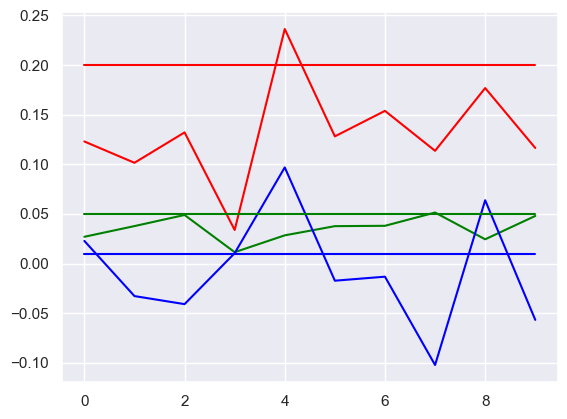

In [388]:
# plot the samples
plt.plot(samples[...,0], color='red')
plt.plot(samples[...,1], color='green')
plt.plot(samples[...,2], color='blue')
plt.plot([0,9], [0.2,0.2], color='red')
plt.plot([0,9], [0.05,0.05], color='green')
plt.plot([0,9], [0.01,0.01], color='blue')

plt.show()


## Task 3.1 : Noise free data

In [390]:
# test_dataset
summary_network = make_summary_network(model)
test_realnvp = conditional_realNVP(3, 9, 8, 20).to(device)
test_hybrid = Hybrid_Network_cond(summary_network, test_realnvp).to(device)

test_hybrid_mmd = train_cinn(
    test_hybrid.to(device),
    dataset_size=10000,
    learning_rate=0.0001,
    epochs=30,
    use_mmd=True,
    mmd_weight=0.7
)

100%|██████████| 30/30 [01:19<00:00,  2.64s/it]


In [391]:
_, _, summary_outputs = evaluate_hybrid_model(test_hybrid_mmd, test_loader)

In [392]:
# Reshape the data to make each tensor a univariate dataset
reshaped_data = summary_outputs.flatten()

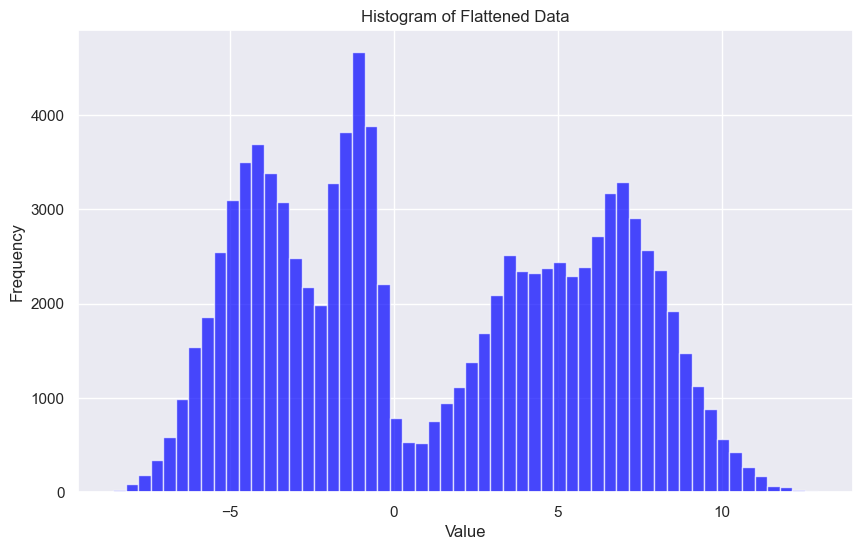

C:\Users\add-iv\AppData\Local\Temp\ipykernel_26576\3846070490.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(reshaped_data, color='red', shade=True)


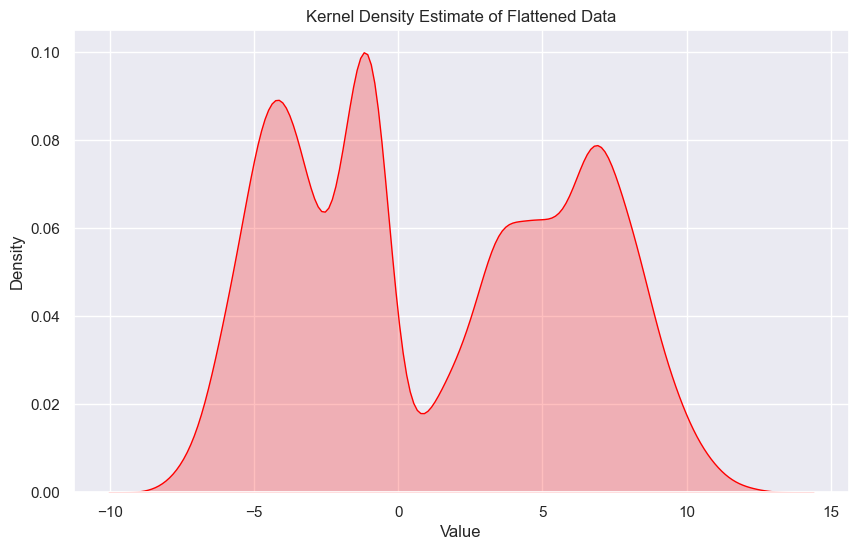

In [393]:
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(reshaped_data, bins='auto', color='blue', alpha=0.7)
plt.title('Histogram of Flattened Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plot a kernel density estimate
plt.figure(figsize=(10, 6))
sns.kdeplot(reshaped_data, color='red', shade=True)
plt.title('Kernel Density Estimate of Flattened Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

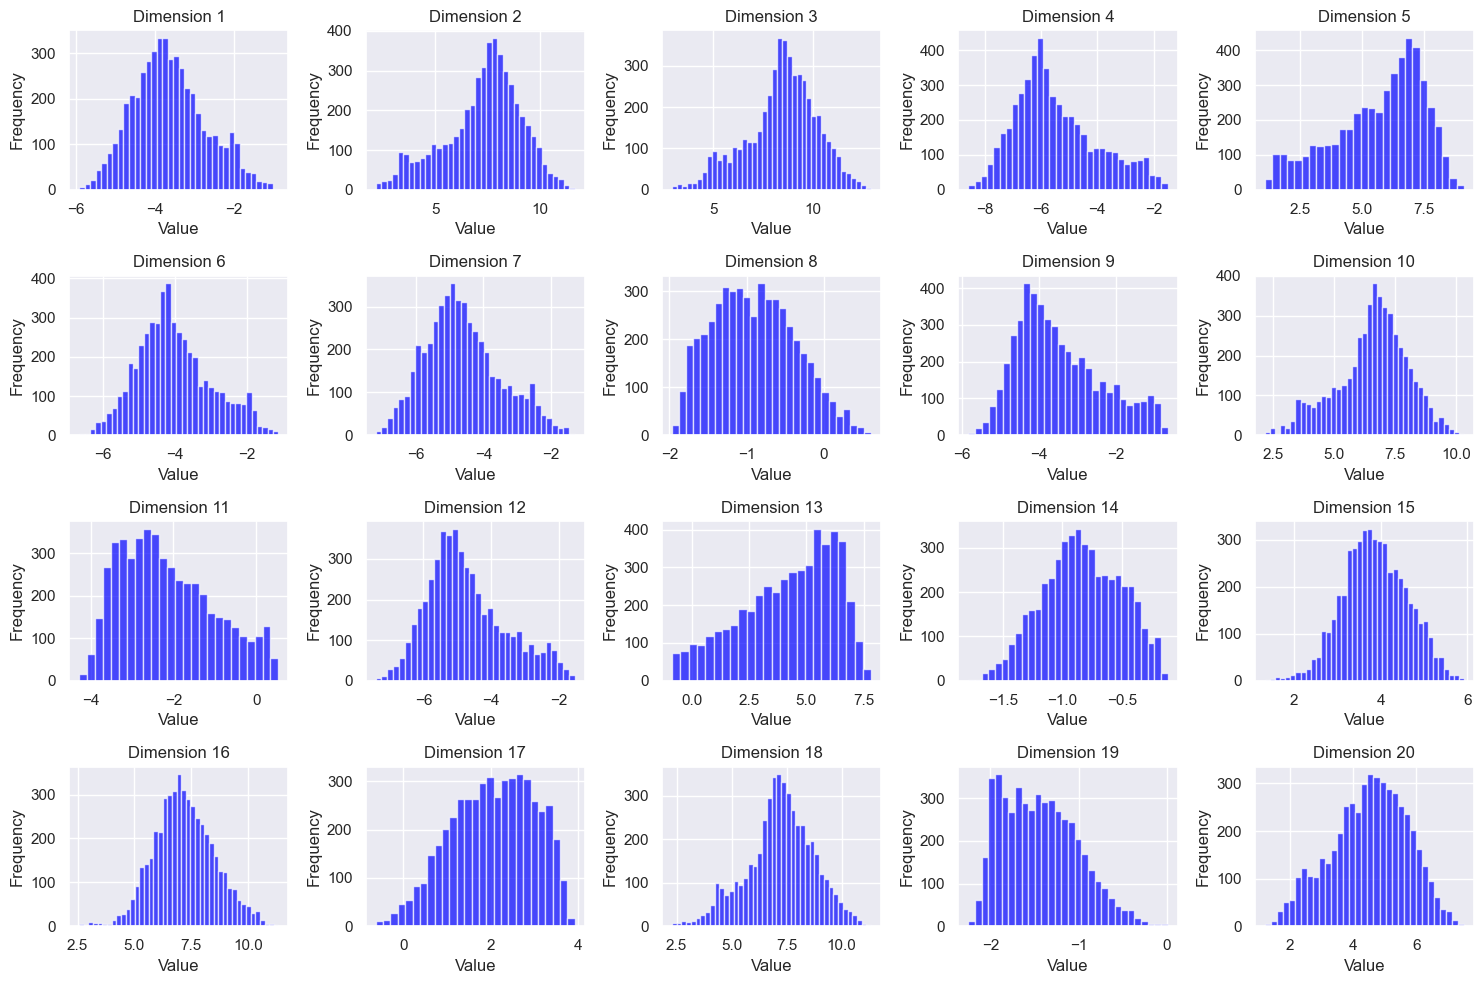

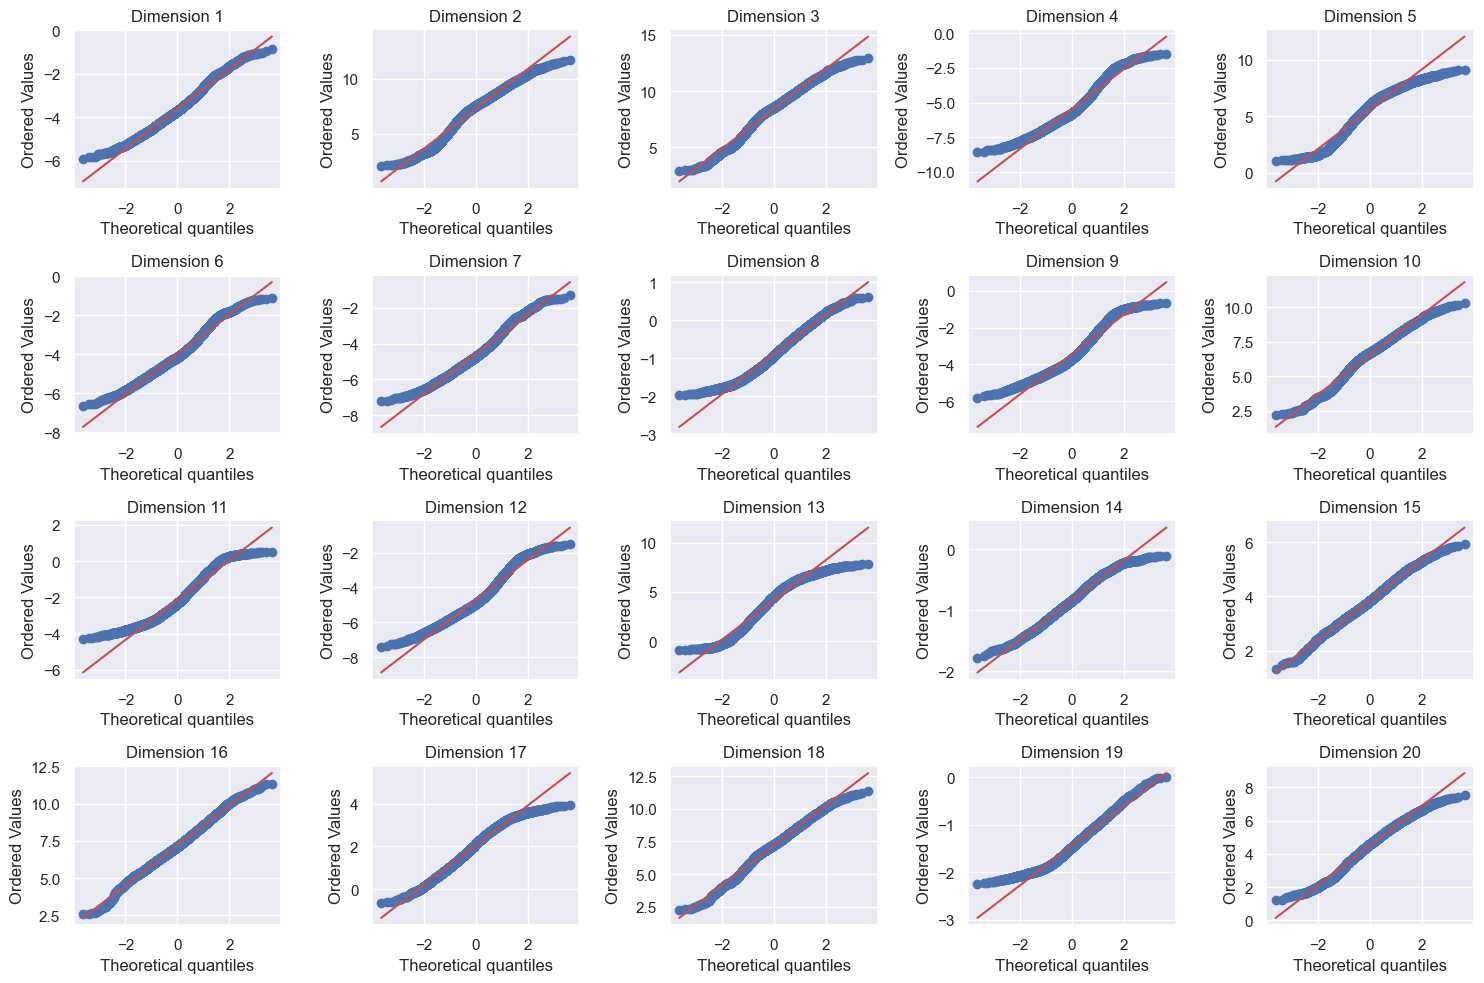

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot

# Plot histograms for individual components
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.hist(summary_outputs[:, i], bins='auto', color='blue', alpha=0.7)
    plt.title(f'Dimension {i + 1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot Q-Q plots for individual components
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    probplot(summary_outputs[:, i], dist=norm, plot=plt)
    plt.title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

In [395]:
from scipy.stats import chi2

tensor_dimension = summary_outputs.shape[1]


# Perform the chi-squared test
observed, _ = np.histogram(reshaped_data, bins='auto')

# Expected frequencies assuming a standard normal distribution
expected = len(reshaped_data) * np.diff(chi2.cdf(_, tensor_dimension - 1))

# Calculate the chi-squared statistic
chi_squared_stat = np.sum((observed - expected)**2 / expected)

# Degrees of freedom
df = len(observed) - 1

# Calculate the critical value for a significance level of 1%
critical_value = chi2.ppf(0.99, df)

# Compare the chi-squared statistic with the critical value
if chi_squared_stat > critical_value:
    print("Reject the null hypothesis (non-normal distribution)")
else:
    print("Fail to reject the null hypothesis (normal distribution)")

Reject the null hypothesis (non-normal distribution)


C:\Users\add-iv\AppData\Local\Temp\ipykernel_26576\3698118639.py:13: RuntimeWarning: divide by zero encountered in divide
  chi_squared_stat = np.sum((observed - expected)**2 / expected)


<div style="color: green; font-weight: bold">Comment<br>

1. The analysis focuses on checking whether the summary network's outputs can be considered as coming from a standard normal distribution. The chi-squared test is used for this purpose, but the interpretation of the results or their implications on model performance is not detailed.But in sample code Offers a thorough analysis, especially in testing the model’s response to different levels of noise and reporting delays. The results are visualized and interpreted in the context of model sensitivity and robustness. This approach provides insights into how the model behaves under different noise conditions and the effectiveness of the chi-squared test in detecting these differences.<br>
2.Uses histogram and kernel density estimation for initial data analysis. The chi-squared test is applied to assess the normality of the summary network's outputs. However, the testing seems limited to this aspect, with less emphasis on varying conditions or extensive evaluation.But in  the Sample Code, the  testing methodology is more robust, involving chi-squared tests under different noise conditions and for varying test set sizes. It also includes visualizing p-values over multiple runs, providing a more in-depth analysis of the model's performance and its ability to detect misspecifications under different scenarios.


## Task 4

In [396]:
class Hybrid_Network_Variance(nn.Module):
    def __init__(self, summary_network, flow_network):
        super().__init__()
        self.summary_network = summary_network
        self.flow_network = flow_network

    def forward(self, y, x, variances):
        cond = self.summary_network(x)
        cond = torch.cat([cond, variances], -1)
        y, ljd = self.flow_network(y, cond)
        return y, ljd
    
    # turn off/on training for specific parts of the network    
    def turn_off_flow_grad(self):
        for param in self.flow_network.parameters():
            param.requires_grad = False
    
    def turn_on_flow_grad(self):
        for param in self.flow_network.parameters():
            param.requires_grad = True

    def turn_off_summary_grad(self):
        for param in self.summary_network.parameters():
            param.requires_grad = False
    
    def turn_on_summary_grad(self):
        for param in self.summary_network.parameters():
            param.requires_grad = True

    # print which parts of the network are trainable
    def print_trainable(self):
        for param in self.flow_network.parameters():
            print(param.requires_grad)
        for param in self.summary_network.parameters():
            print(param.requires_grad)

    def sample(self, num_samples, cond=None):
        if cond is not None:
            cond = self.summary_network(cond)
        return self.flow_network.sample(num_samples, cond=cond)

In [397]:
class SIRDatasetVariance(Dataset):
    def __init__(self, features, labels, variances):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.variances = torch.tensor(variances, dtype=torch.float32)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        sample = {"features": self.features[index], "labels": self.labels[index], "variances": self.variances[index]}
        return sample

In [398]:
def generate_variance_dataset_dataloader(dataset_size, batch_size, mu_var = None, I_0_var = None):
    lambdas = np.random.beta(3, 5, dataset_size)

    if mu_var is None:
        mu_variances = np.random.uniform(0, 0.1, dataset_size)
        mus = np.random.normal(0.1, mu_variances, dataset_size)
        mus = np.clip(mus, 0, 0.3)
    else:
        mus = np.random.normal(0.1, mu_var, dataset_size)

    if I_0_var is None:
        I_0_variances = np.random.uniform(0, 0.2, dataset_size)
        I_0s = np.random.normal(0.2, I_0_variances, dataset_size)
        I_0s = np.clip(I_0s, 0, 0.5)
    else:
        I_0s = np.random.normal(0.2, I_0_var, dataset_size)


    features = []
    labels = []
    variances = []
    for idx, (lam, mu, I_0) in enumerate(zip(lambdas, mus, I_0s)):
        X = simulate_sir_simple(lam, mu, I_0, 100, return_all=False)
        X = np.array(X)
        X = X.flatten()
        features.append(X)
        labels.append([lam, mu, I_0])
        variances.append([mu_variances[idx], I_0_variances[idx]])

    features = np.array(features)
    labels = np.array(labels)
    variances = np.array(variances)

    dataset = SIRDatasetVariance(features, labels, variances)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader

In [399]:
test_dataset_variance = generate_variance_dataset_dataloader(2000, 32)

In [400]:
def train_var_cinn(
    model,
    dataset_size,
    learning_rate,
    epochs,
):
    train_loader = generate_variance_dataset_dataloader(dataset_size, 32)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    ## train and evaluate model
    for _ in tqdm.tqdm(range(epochs)):
        for batch in train_loader:
            features = batch["features"].to(device)
            labels = batch["labels"].to(device)
            variances = batch["variances"].to(device)

            optimizer.zero_grad()

            # Forward pass
            z, ljd = model(labels, features, variances)

            # Backward pass
            loss = torch.sum(0.5 * torch.sum((z-labels) ** 2, -1) - ljd) / features.shape[0]
            loss.backward()
            optimizer.step()

    return model

In [404]:
model = run_MLP_config(
    output_size=3,
    hidden_size=50,
    num_layers=3,
    dataset_size=10000,
    learning_rate=0.0001,
    epochs=100,
)
summary_network = make_summary_network(model)

In [405]:
variance_realnvp = conditional_realNVP(3, 9, 8, 52)
hybrid_variance = Hybrid_Network_Variance(summary_network, variance_realnvp)

In [406]:
hybrid_variance = train_var_cinn(
    hybrid_variance,
    dataset_size=10000,
    learning_rate=0.0001,
    epochs=10,
)

100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


In [407]:
def evaluate_hybrid_model_variance(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    num_samples = 0

    predicted_labels = []

    with torch.no_grad():
        for batch_idx, batch in enumerate(dataloader):
            features = batch["features"].to(device)
            labels = batch["labels"].to(device)
            variances = batch["variances"].to(device)
            
            z, ljd  = model(labels, features, variances)

            total_loss += torch.sum(0.5*torch.sum((z-labels)**2, -1))
            num_samples += features.size(0)
            
            predicted_labels.append(z.cpu())


    average_loss = total_loss / num_samples

    # Add any other evaluation metrics here

    return average_loss, torch.cat(predicted_labels, dim=0)

In [408]:
print(evaluate_hybrid_model_variance(hybrid_variance, test_dataset_variance)[0])

tensor(1.2977)


<div style="color: green; font-weight: bold">Comment<br>

1.Created a custom SIRDatasetVariance class that includes variances as part of the dataset. This class is used to generate data loaders that provide the network with input features, labels, and variances during training.But the Sample Code Uses functions to sample variances and generate datasets with these variances. It also shows a more detailed process of creating datasets, including normalization steps and adjustments for variance levels.<br>
2. Includes a function evaluate_hybrid_model_variance to evaluate the model's performance with the test dataset that includes variances. This evaluation could provide insights into how the model performs under different variance settings.But Sample Code focuses more on post-training analysis like plotting histograms and calibration plots. It gives a detailed view of how the posterior distributions change with different variances but lacks a specific evaluation function like in the above code.<br>
3.The sensitivity analysis approach is not explicitly outlined in the provided code snippet.Whereas,Sample Code Conducts a comprehensive sensitivity analysis by varying the variances of different parameters (lambda, mu, I0) and observing the effect on the learned posterior distribution. This approach directly addresses the question of parameter sensitivity to the choice of prior.


## 2.1 + 2.2 SIR and noisy SIR Model

In [409]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

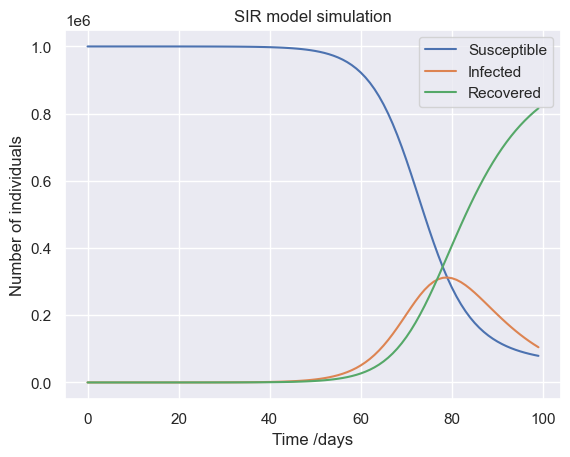

In [410]:

# Define the SIR model differential equations.
def sir_model(S, I, R, N, beta, mu):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - mu * I
    dRdt = mu * I
    return dSdt, dIdt, dRdt

# Implement a function to simulate the SIR model
def simulate_sir_simple(beta, mu, I0, T, N):
    # Initial number of susceptible and recovered individuals
    S0 = N - I0
    R0 = 0
    S, I, R = S0, I0, R0
    
    # Record the initial values in the arrays
    SIR = np.zeros((T, 3))
    SIR[0] = S0, I0, R0
    
    # Use Euler's method to integrate the SIR equations over the time grid
    dt = 1 # One day time step
    for t in range(1, T):
        dSdt, dIdt, dRdt = sir_model(S, I, R, N, beta, mu)
        S += dSdt * dt
        I += dIdt * dt
        R += dRdt * dt
        SIR[t] = S, I, R
    
    return SIR

# Define parameters based on the problem statement
N = 1_000_000  # Total population, N.
beta = 0.3  # Infection rate, lambda in the equations.
mu = 0.1    # Recovery rate, mu in the equations.
I0 = 1      # Initial number of infected individuals, I(0).
T = 100     # Total time to simulate.

# Simulate the SIR model
results = simulate_sir_simple(beta, mu, I0, T, N)

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.plot(results[:, 0], label='Susceptible')
plt.plot(results[:, 1], label='Infected')
plt.plot(results[:, 2], label='Recovered')
plt.legend()
plt.title('SIR model simulation')
plt.xlabel('Time /days')
plt.ylabel('Number of individuals')
plt.show()


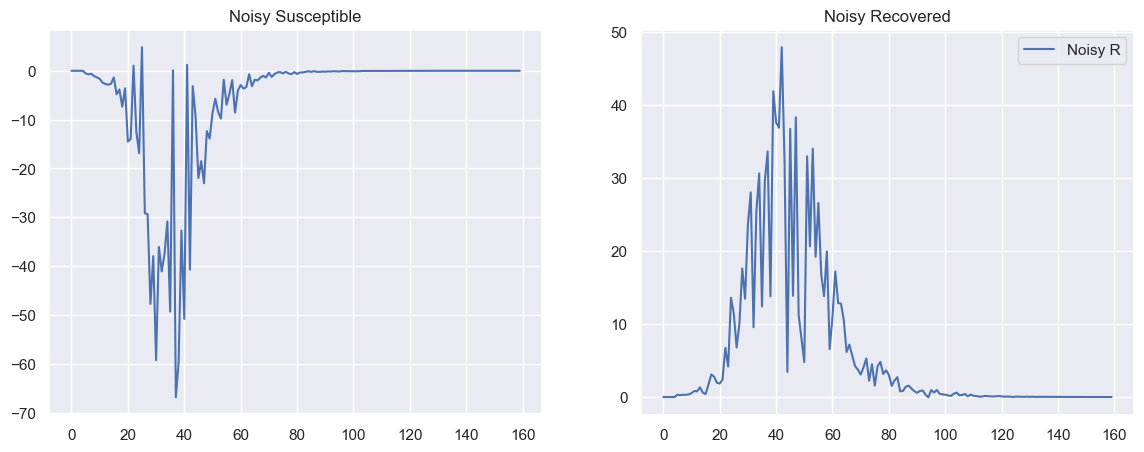

In [411]:
def simulate_sir_noisy(beta, mu, I0, T, N, L, rho, sigma_2):
    # Simulate the SIR model without noise
    SIR = simulate_sir_simple(beta, mu, I0, T, N)
    
    # Generate multiplicative Gaussian noise
    noise_s = np.random.normal(loc=rho, scale=np.sqrt(sigma_2), size=T-L)
    noise_r = np.random.normal(loc=rho, scale=np.sqrt(sigma_2), size=T-L)
    
    # Apply the noise to the differences in S and R
    Delta_S_noisy = (SIR[L:T, 0] - SIR[L-1:T-1, 0]) * noise_s
    Delta_R_noisy = (SIR[L:T, 2] - SIR[L-1:T-1, 2]) * noise_r
    
    # Prepend zeros for the initial L days where we don't have noisy data
    Delta_S_noisy = np.concatenate((np.zeros(L), Delta_S_noisy))
    Delta_R_noisy = np.concatenate((np.zeros(L), Delta_R_noisy))
    
    # Return the noisy sequences
    return np.column_stack((Delta_S_noisy, Delta_R_noisy))

# Parameters
beta = 0.3  # Infection rate
mu = 0.1    # Recovery rate
I0 = 1      # Initial number of infected individuals
T = 160     # Total time in days
N = 1000    # Total population
L = 5       # Days lag for noise
rho = 1     # Mean of the noise
sigma_2 = 0.2  # Variance of the noise

# Generate SIR data
SIR_noisy = simulate_sir_noisy(beta, mu, I0, T, N, L, rho, sigma_2)

# Plot the results
plt.figure(figsize=(14, 5))

# Plot the noisy S and R values
plt.subplot(1, 2, 1)
plt.plot(SIR_noisy[:, 0], label='Noisy S')
plt.title('Noisy Susceptible')

plt.subplot(1, 2, 2)
plt.plot(SIR_noisy[:, 1], label='Noisy R')
plt.title('Noisy Recovered')

plt.legend()
plt.show()

## 2.3 CNN

In [412]:
import numpy as np

# Define parameters for the SIR model and simulation
beta_true = 0.3  # True value of beta
mu_true = 0.1   # True value of mu
I0_true = 1     # Initial infected population
T = 100          # Total number of time steps
N = 1000         # Total population
L = 10           # Length of initial data without noise
rho = 0.0        # Mean of the Gaussian noise
sigma_2 = 0.01   # Variance of the Gaussian noise

# Generate training data using simulate_sir_noisy
training_data = simulate_sir_noisy(beta_true, mu_true, I0_true, T, N, L, rho, sigma_2)

# The training data now contains noisy observations of the SIR model
# You can split it into input (X_train) and target (Y_train) variables as needed
X_train = training_data  # In this case, you can use the entire sequence as input
Y_train = np.column_stack((beta_true * np.ones(T), mu_true * np.ones(T)))


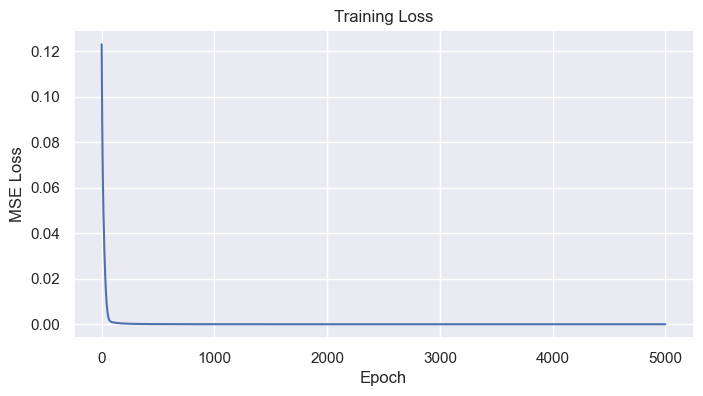

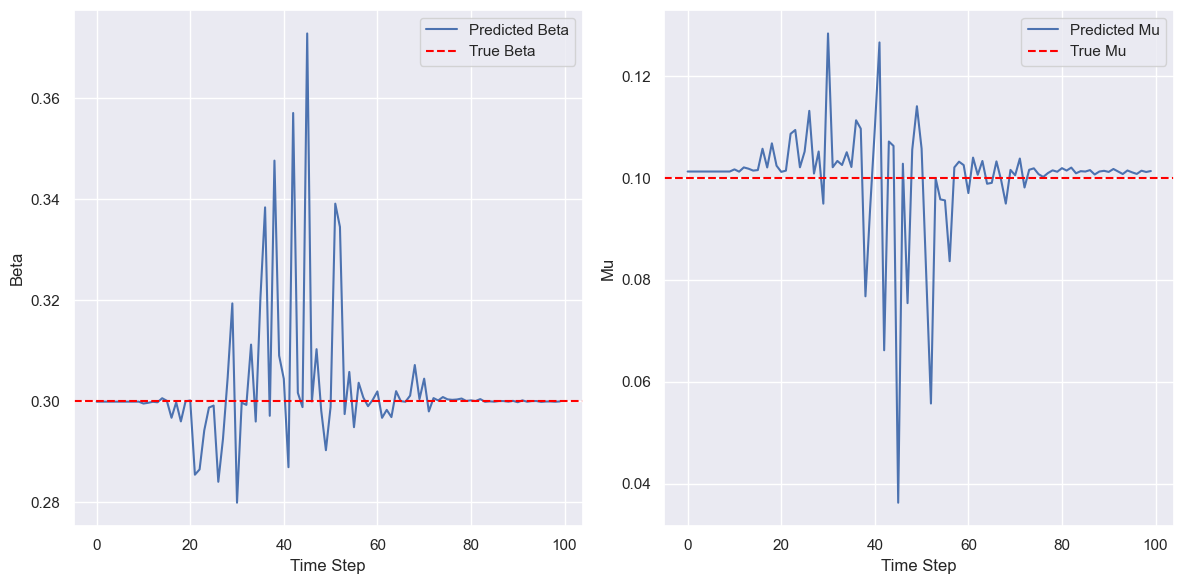

In [413]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the neural network architecture
class ParameterPredictionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ParameterPredictionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Hyperparameters
input_size = 2  # Input size (Delta_S and Delta_R)
hidden_size = 64  # Size of the hidden layer
output_size = 2  # Output size (beta and mu)
learning_rate = 0.001
num_epochs = 5000

# Create the model, loss function, and optimizer
model = ParameterPredictionModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Generate training data
# X_train and Y_train should be prepared as shown in the previous response

# Convert training data to PyTorch tensors
X_train = torch.Tensor(X_train)
Y_train = torch.Tensor(Y_train)

# Training loop
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot the training loss
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Generate a simulated test set
test_data = simulate_sir_noisy(beta_true, mu_true, I0_true, T, N, L, rho, sigma_2)
X_test = torch.Tensor(test_data)

# Predict parameters using the trained model
Y_pred = model(X_test)

# Visualize the predicted parameters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(Y_pred[:, 0].detach().numpy(), label='Predicted Beta')
plt.axhline(beta_true, color='red', linestyle='--', label='True Beta')
plt.xlabel('Time Step')
plt.ylabel('Beta')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Y_pred[:, 1].detach().numpy(), label='Predicted Mu')
plt.axhline(mu_true, color='red', linestyle='--', label='True Mu')
plt.xlabel('Time Step')
plt.ylabel('Mu')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\add-iv\AppData\Local\Temp\ipykernel_26576\3648190581.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
C:\Users\add-iv\AppData\Local\Temp\ipykernel_26576\3648190581.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)


Epoch 0, Loss: 1.4773070812225342
Epoch 10, Loss: -3.49882435798645
Epoch 20, Loss: -10.590361595153809
Epoch 30, Loss: -21.079669952392578
Epoch 40, Loss: -35.905792236328125
Epoch 50, Loss: -56.128475189208984
Epoch 60, Loss: -82.96969604492188
Epoch 70, Loss: -117.74354553222656
Epoch 80, Loss: -161.93458557128906
Epoch 90, Loss: -217.11468505859375


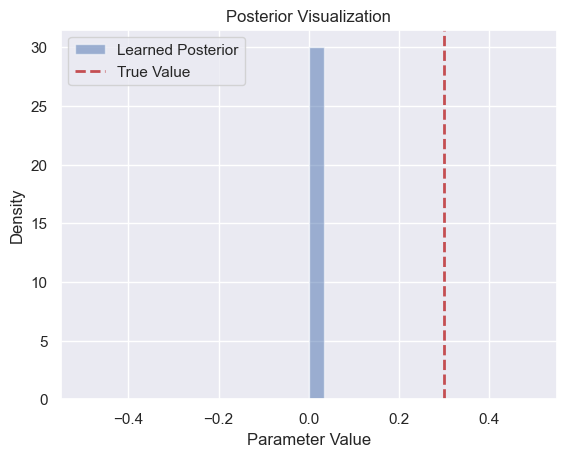

In [414]:
import torch
from torch import nn, optim
from torch.distributions import MultivariateNormal
import numpy as np
import matplotlib.pyplot as plt

# Define the feature extractor (summary network) without the last layer
class FeatureExtractor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(FeatureExtractor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return x

# Define a RealNVP coupling layer
class RealNVPBlock(nn.Module):
    def __init__(self, input_size, hidden_size, conditioning_size):
        super(RealNVPBlock, self).__init__()
        self.scale_net = nn.Sequential(
            nn.Linear(input_size // 2 + conditioning_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size // 2)
        )
        self.translate_net = nn.Sequential(
            nn.Linear(input_size // 2 + conditioning_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size // 2)
        )

    def forward(self, x, conditioning, reverse=False):
        # Split input into two halves
        x1, x2 = x[:, :x.size(1) // 2], x[:, x.size(1) // 2:]
        
        # Condition on the summary network output
        condition = torch.cat([x1, conditioning], dim=-1)
        
        if not reverse:
            # Forward computation for RealNVP
            s = self.scale_net(condition)
            t = self.translate_net(condition)
            y1 = x1  # First half remains the same
            y2 = (x2 - t) * torch.exp(-s)  # Apply affine transformation
            return torch.cat([y1, y2], dim=-1)
        else:
            # Reverse computation for RealNVP
            s = self.scale_net(condition)
            t = self.translate_net(condition)
            y1 = x1  # First half remains the same
            y2 = x2 * torch.exp(s) + t  # Inverse affine transformation
            return torch.cat([y1, y2], dim=-1)

# Assemble the Conditional RealNVP model
class ConditionalRealNVP(nn.Module):
    def __init__(self, input_size, hidden_size, conditioning_size, num_blocks):
        super(ConditionalRealNVP, self).__init__()
        self.blocks = nn.ModuleList([RealNVPBlock(input_size, hidden_size, conditioning_size) for _ in range(num_blocks)])
        self.conditioning_size = conditioning_size

    def forward(self, x, conditioning, reverse=False):
        if not reverse:
            for block in self.blocks:
                x = block(x, conditioning)
            return x
        else:
            for block in reversed(self.blocks):
                x = block(x, conditioning, reverse=True)
            return x

    def log_prob(self, x, conditioning):
        # Compute the log-likelihood of x given the conditioning
        z = self.forward(x, conditioning)  # Transform to latent space
        log_det = sum([block.scale_net(torch.cat([z[:, :z.size(1) // 2], conditioning], dim=-1)).sum(dim=1) for block in self.blocks])
        log_prob_z = MultivariateNormal(torch.zeros(z.size(1)), torch.eye(z.size(1))).log_prob(z)
        return log_prob_z + log_det

# Instantiate the feature extractor and the RealNVP model
input_size = 2  # Assuming
# Continue the instantiation with the correct input sizes and parameters
feature_extractor_hidden_size = 100  # Example hidden size for feature extractor
realnvp_hidden_size = 100  # Example hidden size for RealNVP blocks
conditioning_size = feature_extractor_hidden_size  # Output size of the feature extractor
num_blocks = 5  # Number of RealNVP blocks
input_size = 100  # Size of the input data, change according to your specific problem

feature_extractor = FeatureExtractor(input_size=input_size, hidden_size=feature_extractor_hidden_size)
conditional_realnvp = ConditionalRealNVP(input_size=input_size, hidden_size=realnvp_hidden_size, conditioning_size=conditioning_size, num_blocks=num_blocks)

# Define the optimizer
parameters = list(feature_extractor.parameters()) + list(conditional_realnvp.parameters())
optimizer = optim.Adam(parameters, lr=1e-3)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

# Define the input size based on the training data
input_size = X_train_tensor.shape[1]  # This should match the number of features in X_train

# Define the feature extractor and RealNVP model with the actual input size
feature_extractor = FeatureExtractor(input_size=input_size, hidden_size=feature_extractor_hidden_size)
conditional_realnvp = ConditionalRealNVP(input_size=input_size, hidden_size=realnvp_hidden_size, conditioning_size=conditioning_size, num_blocks=num_blocks)

# Define the optimizer
parameters = list(feature_extractor.parameters()) + list(conditional_realnvp.parameters())
optimizer = optim.Adam(parameters, lr=1e-3)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    feature_extractor.train()
    conditional_realnvp.train()
    optimizer.zero_grad()
    
    # Extract features from the noisy SIR data
    conditioning = feature_extractor(X_train_tensor)
    
    # Calculate NLL loss
    loss = -conditional_realnvp.log_prob(Y_train_tensor, conditioning).mean()
    
    # Backpropagation
    loss.backward()
    optimizer.step()
    
    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Visualization of the posteriors for some test instance
feature_extractor.eval()
conditional_realnvp.eval()
with torch.no_grad():
    # Select a test instance from the SIR model data
    test_instance = X_train_tensor[0:1]  # Take the first instance for visualization
    conditioning = feature_extractor(test_instance)
    
    # Sample from the RealNVP given the conditioning
    samples = conditional_realnvp(test_instance, conditioning, reverse=True)
    
    # Visualization setup - adjust as needed for your specific visualization goals
    plt.hist(samples[:, 0].numpy(), bins=30, density=True, alpha=0.5, label='Learned Posterior')
    plt.axvline(Y_train_tensor[0, 0].item(), color='r', linestyle='dashed', linewidth=2, label='True Value')
    plt.title('Posterior Visualization')
    plt.xlabel('Parameter Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

<div style="color: green; font-weight: bold">Comment<br>
1.Above Code  Implements simulate sir noisy to generate noisy SIR data to generate noisy SIR data based on the parameters $\lambda, \mu, I_0, L, \rho, $and$\sigma^2$. The noise model adds multiplicative The noise model adds multiplicative Gaussian noise to the susceptible (S) and recovered (R) populations after a delay period (L).Whereas Sample Code Also implements a noisy SIR simulation with similar parameters.However, it applies the noise to both the S, l, and R compartments and uses a different approach for applying the delay (L) and the noise $(\rho,|\sigma^2)$ to the data.<br>
2.Includes a training loop with Mean Squared Error (MSE) loss and visualizes the predicted parameters. Also, it integrates the feature extractor and RealNVP in a conditional flow setup.But the sample code also trains a model but goes further in evaluating the performance using calibration plots and effective sample size plots. This approach provides a more comprehensive analysis of the model's ability to capture the posterior distributions of the parameters.</div>

